# 고혈압 유무에 따른 질병여부 비교

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


# altair 라이브러리 사용
!pip install altair
import altair as alt

In [23]:
검진정보 = pd.read_csv(
    "./검진정보.csv",
)

In [24]:
검진정보['혈압'] #정상혈압, 저혈압, 고혈압

0         정상혈압
1         정상혈압
2         정상혈압
3         정상혈압
4          고혈압
          ... 
999995    정상혈압
999996    정상혈압
999997    정상혈압
999998    정상혈압
999999    정상혈압
Name: 혈압, Length: 1000000, dtype: object

## 혈압 상태에 따른 간질환 여부

In [25]:
df = 검진정보.groupby(["혈압","성별","연령대", "간질환"]).count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 
df["성별-연령대"] = df["연령대"] + '-'+ df["성별"].astype(str)
df.drop(df.loc[:,"기준년도":"데이터 공개일자"],axis=1,inplace=True)
df

,혈압,성별,연령대,간질환,빈혈유무,BMI,비만정도,당뇨,혈청크레아티닌유무,신장질환,사람수,성별-연령대
0,고혈압,남,40대,비정상,4035,4035,4035,4035,4035,4035,4035,40대-남
1,고혈압,남,40대,위험군,5634,5634,5634,5634,5634,5634,5634,40대-남
2,고혈압,남,40대,정상,16133,16133,16133,16130,16133,16133,16133,40대-남
3,고혈압,남,50대,비정상,3352,3352,3352,3352,3352,3352,3352,50대-남
4,고혈압,남,50대,위험군,4262,4262,4262,4262,4262,4262,4262,50대-남
...,...,...,...,...,...,...,...,...,...,...,...,...
85,정상혈압,여,70대,위험군,2157,2157,2157,2157,2157,2157,2157,70대-여
86,정상혈압,여,70대,정상,37443,37443,37443,37442,37443,37443,37443,70대-여
87,정상혈압,여,80대,비정상,279,279,279,278,279,279,279,80대-여
88,정상혈압,여,80대,위험군,451,451,451,451,451,451,451,80대-여


In [26]:
# 혈압상태 - 간질환
# 간질환 - 정상 포함

alt.Chart(df).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('혈압:N', title=None),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(사람수):Q',
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('성별-연령대:N', title=None),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('간질환:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#ffcc5c','#ff6f69', '#96ceb4'],  
            ),
        ))\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    )

alt.Chart(...)

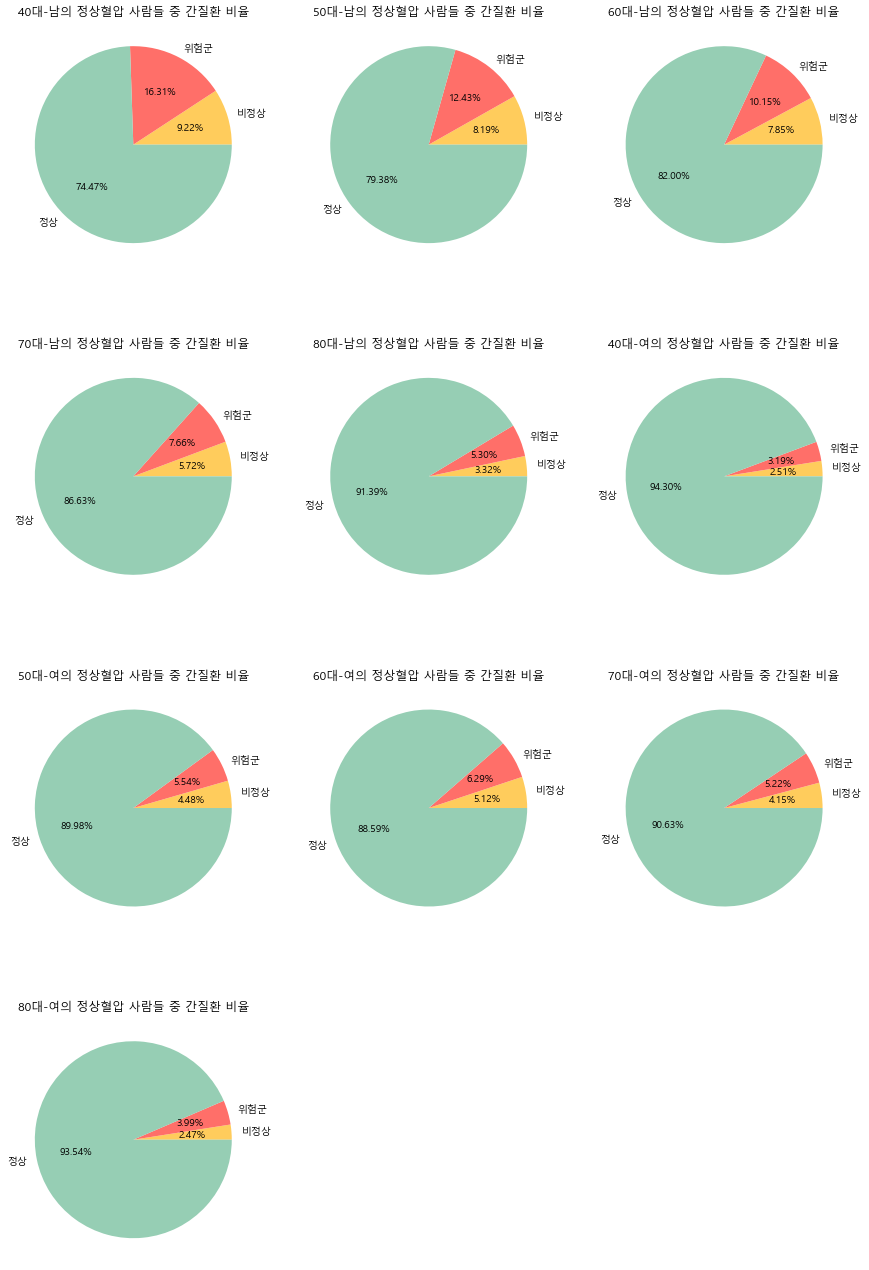

In [27]:
#정상혈압이면 간질환이 있을까?

index = df[df['혈압'] !='정상혈압'].index
df.drop(index, inplace=True)

n = len(df['성별-연령대'].unique())
j = 1
plt.figure(figsize = (15,60))

for i in (df['성별-연령대'].unique()):
    plt.subplot(n,3,j)
    df1 = df[df['성별-연령대']==i]
    df1 = df1.groupby(['간질환'])[['사람수']].sum()
    df1.reset_index(inplace=True)
    x = df1['사람수'].values
    labels = df1['간질환'].values
    color = ['#ffcc5c','#ff6f69', '#96ceb4']
    plt.pie(x,labels=labels, autopct='%.2f%%', colors = color) 
    plt.title(i+'의 정상혈압 사람들 중 간질환 비율')
    j += 1

plt.show()

## 혈압상태에 따른 신장질환 여부

In [28]:
df = 검진정보.groupby(["혈압","성별","연령대", "신장질환"]).count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 
df["성별-연령대"] = df["연령대"] + '-'+ df["성별"].astype(str)
df.drop(df.loc[:,"기준년도":"데이터 공개일자"],axis=1,inplace=True)
df.head(10)

,혈압,성별,연령대,신장질환,빈혈유무,BMI,비만정도,당뇨,혈청크레아티닌유무,간질환,사람수,성별-연령대
0,고혈압,남,40대,비정상,3131,3131,3131,3131,3131,3131,3131,40대-남
1,고혈압,남,40대,위험군,2341,2341,2341,2340,2341,2341,2341,40대-남
2,고혈압,남,40대,정상,20330,20330,20330,20328,20330,20330,20330,40대-남
3,고혈압,남,50대,비정상,3079,3079,3079,3079,3079,3079,3079,50대-남
4,고혈압,남,50대,위험군,2800,2800,2800,2800,2800,2800,2800,50대-남
5,고혈압,남,50대,정상,22215,22215,22215,22215,22215,22215,22215,50대-남
6,고혈압,남,60대,비정상,2771,2771,2771,2771,2771,2771,2771,60대-남
7,고혈압,남,60대,위험군,2806,2806,2806,2806,2806,2806,2806,60대-남
8,고혈압,남,60대,정상,18529,18529,18529,18529,18529,18529,18529,60대-남
9,고혈압,남,70대,비정상,1764,1764,1764,1764,1764,1764,1764,70대-남


In [29]:
# 혈압상태 - 신장질환
# 신장질환 - 정상 포함

alt.Chart(df).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('혈압:N', title=None),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(사람수):Q',
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('성별-연령대:N', title=None),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('신장질환:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#ffcc5c','#ff6f69', '#96ceb4'],  
            ),
        ))\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    )

alt.Chart(...)

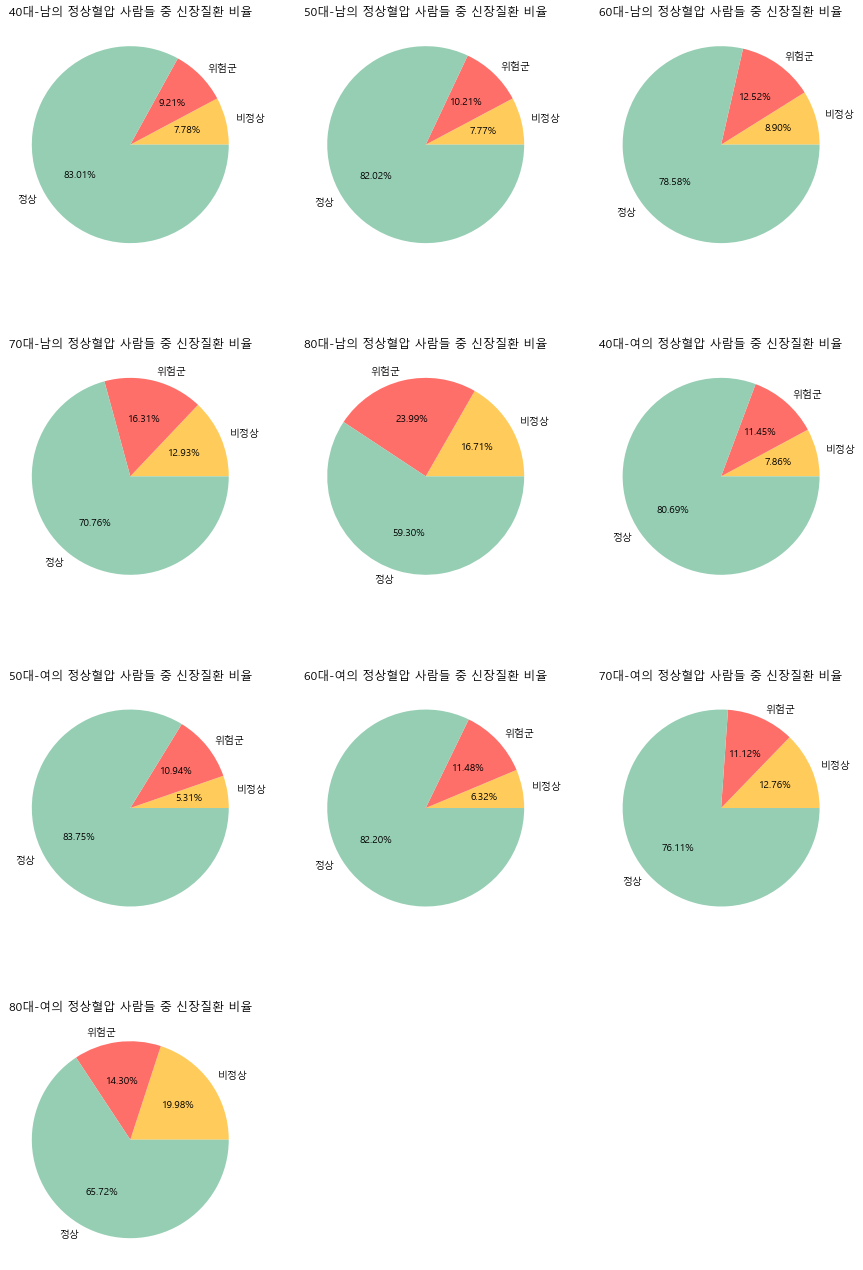

In [30]:
#정상혈압이면 신장질환이 있을까?

index = df[df['혈압'] !='정상혈압'].index
df.drop(index, inplace=True)

n = len(df['성별-연령대'].unique())
j = 1
plt.figure(figsize = (15,60))

for i in (df['성별-연령대'].unique()):
    plt.subplot(n,3,j)
    df1 = df[df['성별-연령대']==i]
    df1 = df1.groupby(['신장질환'])[['사람수']].sum()
    df1.reset_index(inplace=True)
    x = df1['사람수'].values
    labels = df1['신장질환'].values
    color = ['#ffcc5c','#ff6f69', '#96ceb4']
    plt.pie(x,labels=labels, autopct='%.2f%%', colors = color) 
    plt.title(i+'의 정상혈압 사람들 중 신장질환 비율')
    j += 1

plt.show()

## 혈압상태에 따른 빈혈 여부

In [31]:
df = 검진정보.groupby(["혈압","성별","연령대", "빈혈유무"]).count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 
df["성별-연령대"] = df["연령대"] + '-'+ df["성별"].astype(str)
df.drop(df.loc[:,"기준년도":"데이터 공개일자"],axis=1,inplace=True)
df.head(10)

,혈압,성별,연령대,빈혈유무,BMI,비만정도,당뇨,혈청크레아티닌유무,신장질환,간질환,사람수,성별-연령대
0,고혈압,남,40대,비정상,114,114,114,114,114,114,114,40대-남
1,고혈압,남,40대,정상,25688,25688,25685,25688,25688,25688,25688,40대-남
2,고혈압,남,50대,비정상,242,242,242,242,242,242,242,50대-남
3,고혈압,남,50대,정상,27852,27852,27852,27852,27852,27852,27852,50대-남
4,고혈압,남,60대,비정상,388,388,388,388,388,388,388,60대-남
5,고혈압,남,60대,정상,23718,23718,23718,23718,23718,23718,23718,60대-남
6,고혈압,남,70대,비정상,563,563,563,563,563,563,563,70대-남
7,고혈압,남,70대,정상,13015,13015,13014,13015,13015,13015,13015,70대-남
8,고혈압,남,80대,비정상,401,401,401,401,401,401,401,80대-남
9,고혈압,남,80대,정상,3287,3287,3286,3287,3287,3287,3287,80대-남


In [32]:
# 혈압상태 - 빈혈유무
# 간질환 - 정상 포함

alt.Chart(df).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('혈압:N', title=None),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(사람수):Q',
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('성별-연령대:N', title=None),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('빈혈유무:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#ffcc5c','#ff6f69', '#96ceb4'],  
            ),
        ))\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    )

alt.Chart(...)

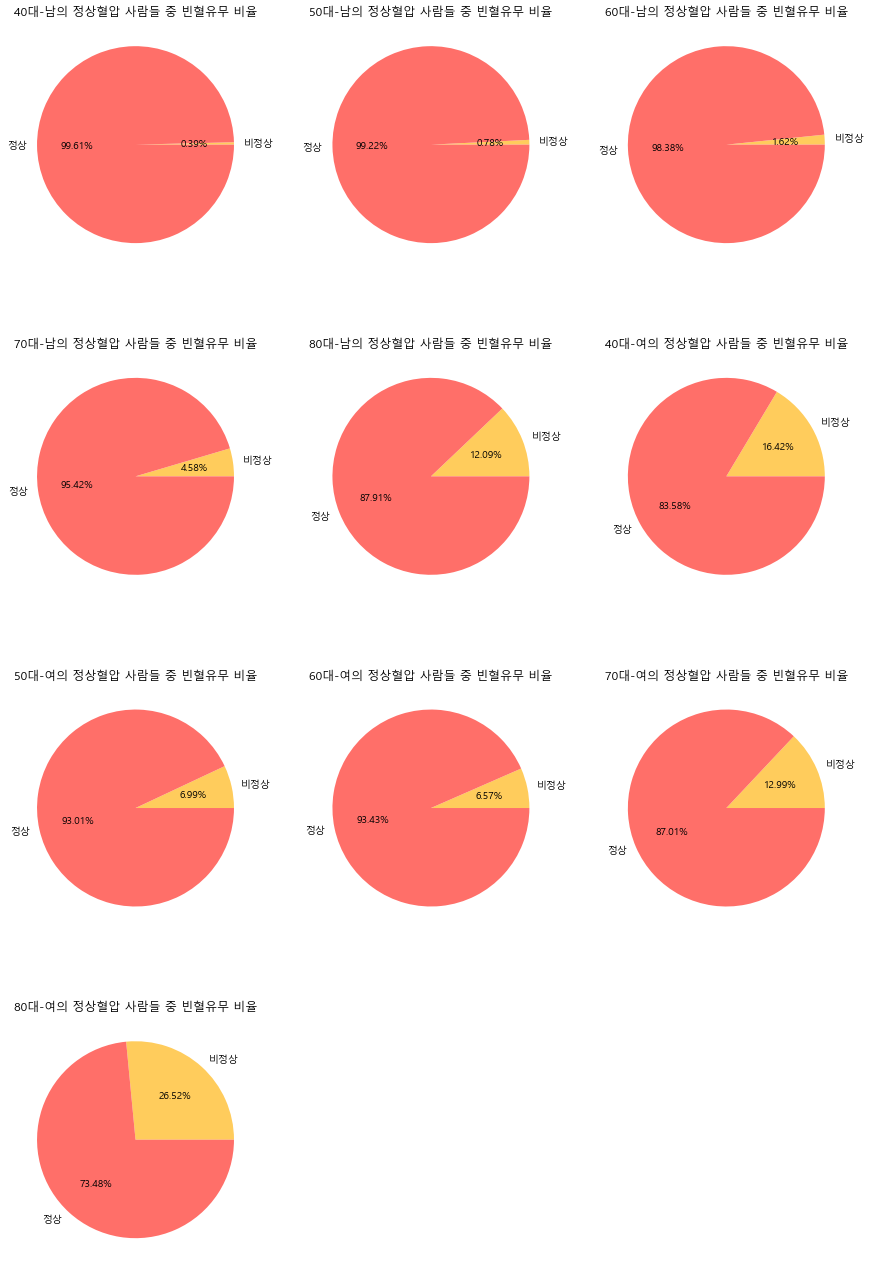

In [33]:
#정상혈압이면 간질환이 있을까?

index = df[df['혈압'] !='정상혈압'].index
df.drop(index, inplace=True)

n = len(df['성별-연령대'].unique())
j = 1
plt.figure(figsize = (15,60))

for i in (df['성별-연령대'].unique()):
    plt.subplot(n,3,j)
    df1 = df[df['성별-연령대']==i]
    df1 = df1.groupby(['빈혈유무'])[['사람수']].sum()
    df1.reset_index(inplace=True)
    x = df1['사람수'].values
    labels = df1['빈혈유무'].values
    color = ['#ffcc5c','#ff6f69', '#96ceb4']
    plt.pie(x,labels=labels, autopct='%.2f%%', colors = color) 
    plt.title(i+'의 정상혈압 사람들 중 빈혈유무 비율')
    j += 1

plt.show()

## 혈압상태에 따른 비만 여부

In [43]:
df = 검진정보.groupby(["혈압","성별","연령대", "비만정도"]).count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 
df["성별-연령대"] = df["연령대"] + '-'+ df["성별"].astype(str)
df.drop(df.loc[:,"기준년도":"데이터 공개일자"],axis=1,inplace=True)
df.head(10)

,혈압,성별,연령대,비만정도,빈혈유무,BMI,당뇨,혈청크레아티닌유무,신장질환,간질환,사람수,성별-연령대
0,고혈압,남,40대,1단계 비만,12750,12750,12747,12750,12750,12750,12750,40대-남
1,고혈압,남,40대,2단계 비만,4559,4559,4559,4559,4559,4559,4559,40대-남
2,고혈압,남,40대,위험체중,4603,4603,4603,4603,4603,4603,4603,40대-남
3,고혈압,남,40대,저체중,194,194,194,194,194,194,194,40대-남
4,고혈압,남,40대,정상,3696,3696,3696,3696,3696,3696,3696,40대-남
5,고혈압,남,50대,1단계 비만,13669,13669,13669,13669,13669,13669,13669,50대-남
6,고혈압,남,50대,2단계 비만,2369,2369,2369,2369,2369,2369,2369,50대-남
7,고혈압,남,50대,위험체중,6168,6168,6168,6168,6168,6168,6168,50대-남
8,고혈압,남,50대,저체중,298,298,298,298,298,298,298,50대-남
9,고혈압,남,50대,정상,5590,5590,5590,5590,5590,5590,5590,50대-남


In [35]:
# 혈압상태 - 비만여부
# 비만여부 - 정상 포함

alt.Chart(df).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('혈압:N', title=None),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(사람수):Q',
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('성별-연령대:N', title=None),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('비만정도:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#96ceb4', '#e377c2','#ff6f69', '#ffcc5c','#17becf'],  
            ),
        ))\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    )

alt.Chart(...)

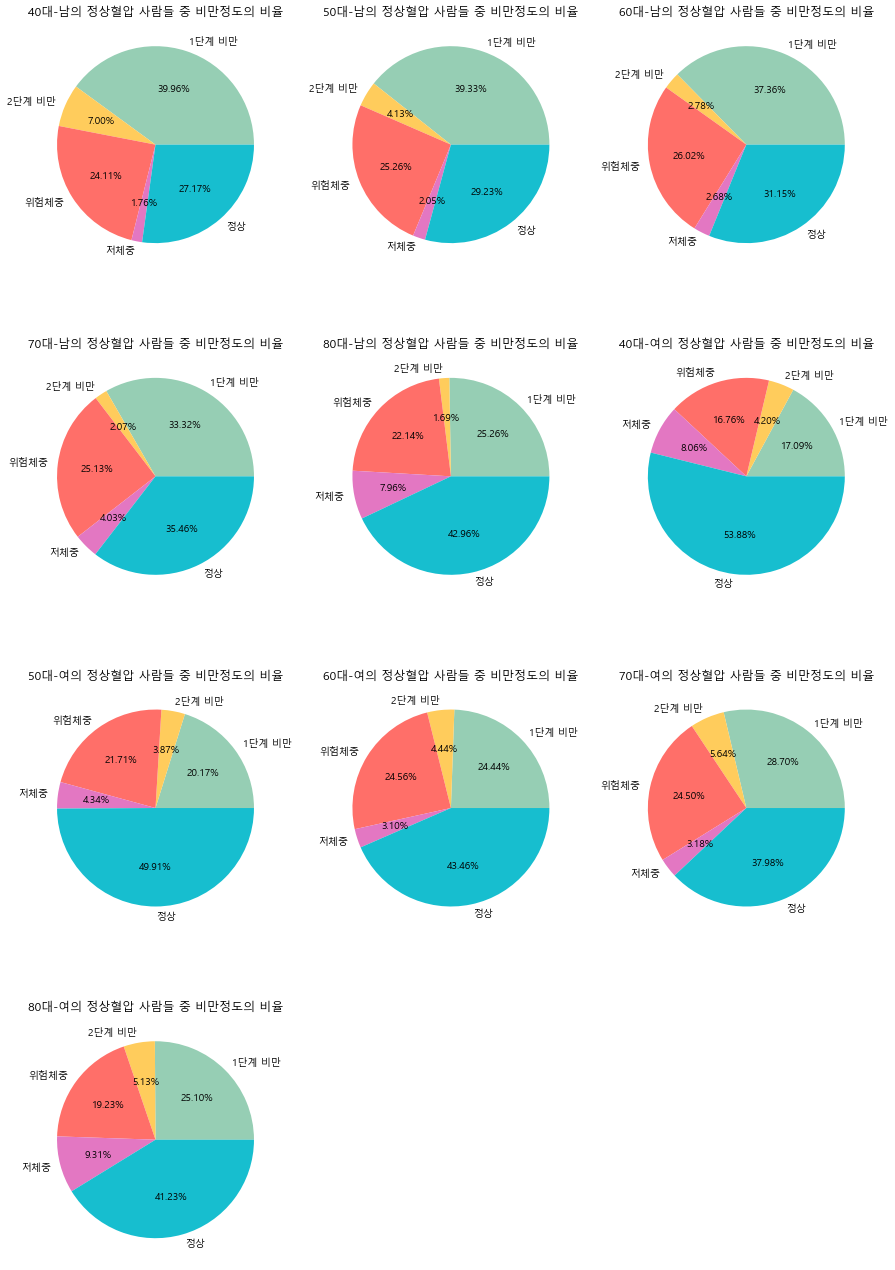

In [44]:
# 정상혈압이면 비만일까?

index = df[df['혈압'] !='정상혈압'].index
df.drop(index, inplace=True)


n = len(df['성별-연령대'].unique())
j = 1
plt.figure(figsize = (15,60))

for i in (df['성별-연령대'].unique()):
    plt.subplot(n,3,j)
    df1 = df[df['성별-연령대']==i]
    df1 = df1.groupby(['비만정도'])[['사람수']].sum()
    df1.reset_index(inplace=True)
    x = df1['사람수'].values
    labels = df1['비만정도'].values
    color = ['#96ceb4', '#ffcc5c','#ff6f69', '#e377c2','#17becf']
    plt.pie(x,labels=labels, autopct='%.2f%%', colors = color) 
    plt.title(i+'의 정상혈압 사람들 중 비만정도의 비율')
    j += 1

plt.show()

## 혈압상태에 따른 당뇨병 여부

In [37]:
df = 검진정보.groupby(["혈압","성별","연령대", "당뇨"]).count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 
df["성별-연령대"] = df["연령대"] + '-'+ df["성별"].astype(str)
df.drop(df.loc[:,"기준년도":"데이터 공개일자"],axis=1,inplace=True)
df.head(10)

,혈압,성별,연령대,당뇨,빈혈유무,BMI,비만정도,혈청크레아티닌유무,신장질환,간질환,사람수,성별-연령대
0,고혈압,남,40대,공복혈당장애,10896,10896,10896,10896,10896,10896,10896,40대-남
1,고혈압,남,40대,당뇨병,3529,3529,3529,3529,3529,3529,3529,40대-남
2,고혈압,남,40대,정상,11374,11374,11374,11374,11374,11374,11374,40대-남
3,고혈압,남,50대,공복혈당장애,12191,12191,12191,12191,12191,12191,12191,50대-남
4,고혈압,남,50대,당뇨병,5218,5218,5218,5218,5218,5218,5218,50대-남
5,고혈압,남,50대,정상,10685,10685,10685,10685,10685,10685,10685,50대-남
6,고혈압,남,60대,공복혈당장애,10467,10467,10467,10467,10467,10467,10467,60대-남
7,고혈압,남,60대,당뇨병,4974,4974,4974,4974,4974,4974,4974,60대-남
8,고혈압,남,60대,정상,8665,8665,8665,8665,8665,8665,8665,60대-남
9,고혈압,남,70대,공복혈당장애,5541,5541,5541,5541,5541,5541,5541,70대-남


In [38]:
# 혈압상태 - 당뇨여부
# 당뇨여부 - 정상 포함

alt.Chart(df).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('혈압:N', title=None),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(사람수):Q',
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('성별-연령대:N', title=None),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('당뇨:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#ffcc5c','#ff6f69', '#96ceb4'],  
            ),
        ))\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    )

alt.Chart(...)

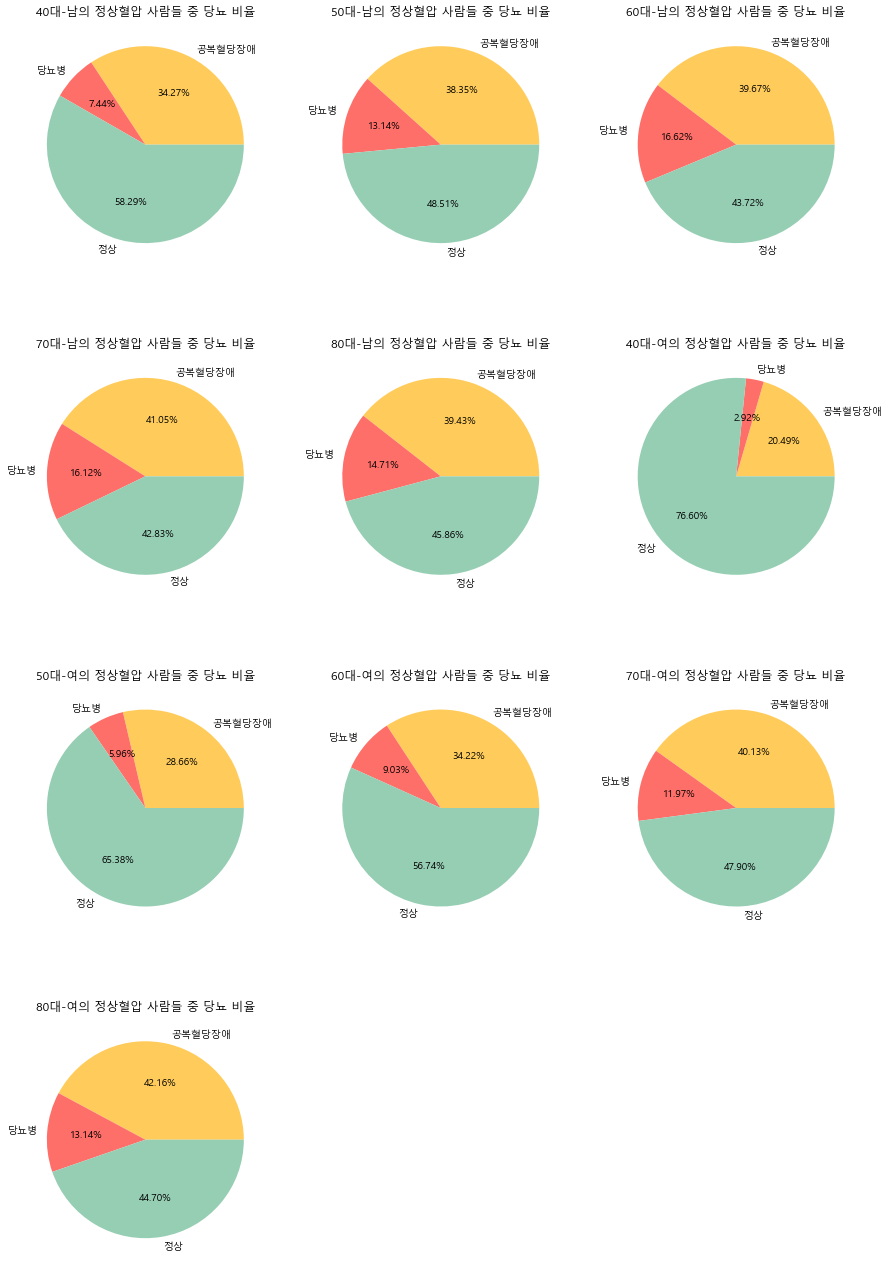

In [39]:
# 고혈압 환자는 당뇨일까?

index = df[df['혈압'] !='정상혈압'].index
df.drop(index, inplace=True)


n = len(df['성별-연령대'].unique())
j = 1
plt.figure(figsize = (15,60))

for i in (df['성별-연령대'].unique()):
    plt.subplot(n,3,j)
    df1 = df[df['성별-연령대']==i]
    df1 = df1.groupby(['당뇨'])[['사람수']].sum()
    df1.reset_index(inplace=True)
    x = df1['사람수'].values
    labels = df1['당뇨'].values
    color = ['#ffcc5c','#ff6f69', '#96ceb4']
    plt.pie(x,labels=labels, autopct='%.2f%%', colors = color) 
    plt.title(i+'의 정상혈압 사람들 중 당뇨 비율')
    j += 1

plt.show()

## 혈압상태에 따른 간장질환 여부

In [40]:
df = 검진정보.groupby(["혈압","성별","연령대", "혈청크레아티닌유무"]).count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 
df["간장질환"] = df["혈청크레아티닌유무"]
df["성별-연령대"] = df["연령대"] + '-'+ df["성별"].astype(str)
df.drop(df.loc[:,"기준년도":"데이터 공개일자"],axis=1,inplace=True)
df.head(10)

,혈압,성별,연령대,혈청크레아티닌유무,빈혈유무,BMI,비만정도,당뇨,신장질환,간질환,사람수,간장질환,성별-연령대
0,고혈압,남,40대,비정상,2829,2829,2829,2828,2829,2829,2829,비정상,40대-남
1,고혈압,남,40대,정상,22973,22973,22973,22971,22973,22973,22973,정상,40대-남
2,고혈압,남,50대,비정상,3418,3418,3418,3418,3418,3418,3418,비정상,50대-남
3,고혈압,남,50대,정상,24676,24676,24676,24676,24676,24676,24676,정상,50대-남
4,고혈압,남,60대,비정상,3553,3553,3553,3553,3553,3553,3553,비정상,60대-남
5,고혈압,남,60대,정상,20553,20553,20553,20553,20553,20553,20553,정상,60대-남
6,고혈압,남,70대,비정상,2891,2891,2891,2891,2891,2891,2891,비정상,70대-남
7,고혈압,남,70대,정상,10687,10687,10687,10686,10687,10687,10687,정상,70대-남
8,고혈압,남,80대,비정상,1149,1149,1149,1149,1149,1149,1149,비정상,80대-남
9,고혈압,남,80대,정상,2539,2539,2539,2538,2539,2539,2539,정상,80대-남


In [41]:
# 혈압상태 - 간장질환여부
# 간장질환여부 - 정상 포함

alt.Chart(df).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('혈압:N', title=None),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(사람수):Q',
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('성별-연령대:N', title=None),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('간장질환:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#ff6f69', '#ffcc5c'],  
            ),
        ))\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    )

alt.Chart(...)

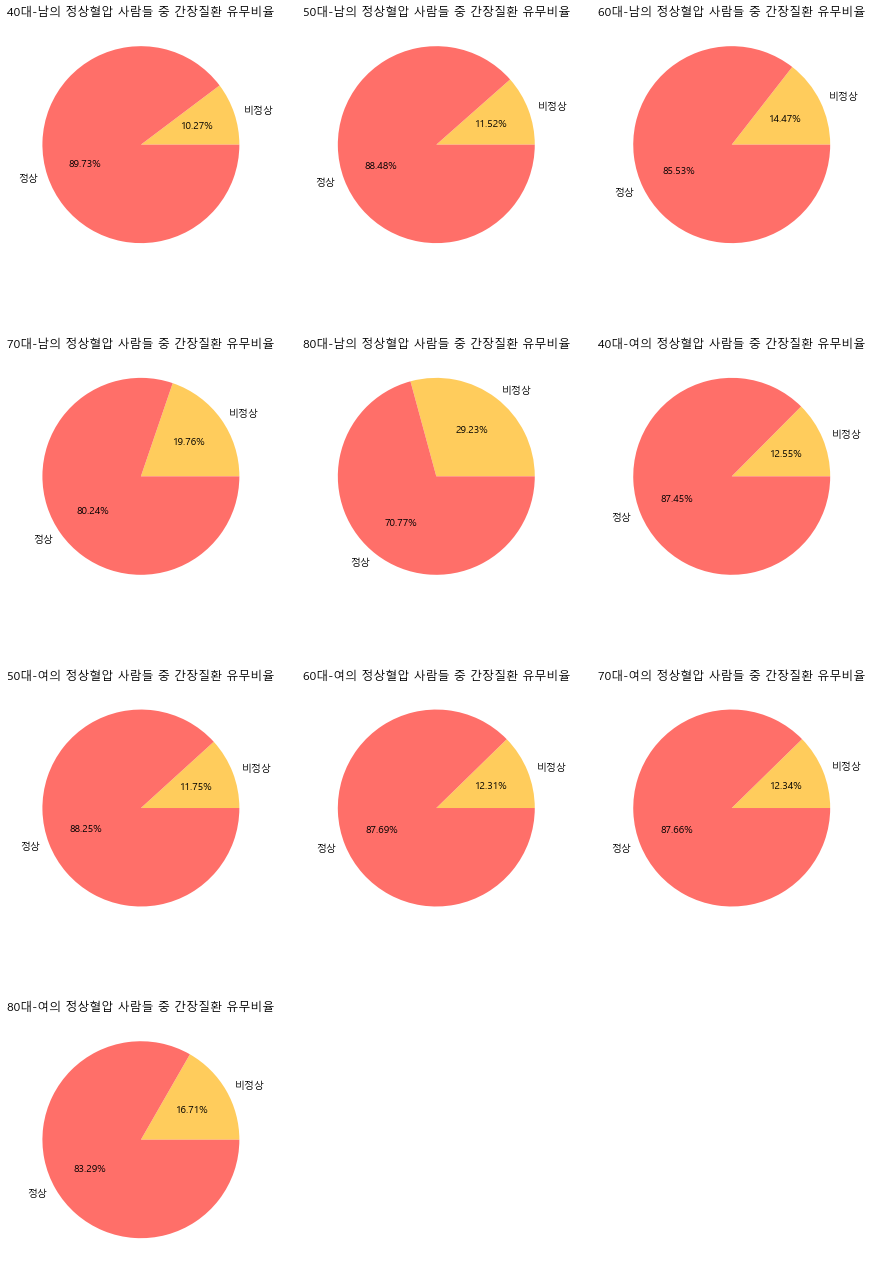

In [42]:
# 고혈압 환자는 간장질환이 있일까?

index = df[df['혈압'] !='정상혈압'].index
df.drop(index, inplace=True)


n = len(df['성별-연령대'].unique())
j = 1
plt.figure(figsize = (15,60))

for i in (df['성별-연령대'].unique()):
    plt.subplot(n,3,j)
    df1 = df[df['성별-연령대']==i]
    df1 = df1.groupby(['간장질환'])[['사람수']].sum()
    df1.reset_index(inplace=True)
    x = df1['사람수'].values
    labels = df1['간장질환'].values
    color = ['#ffcc5c','#ff6f69', '#96ceb4']
    plt.pie(x,labels=labels, autopct='%.2f%%', colors = color) 
    plt.title(i+'의 정상혈압 사람들 중 간장질환 유무비율')
    j += 1

plt.show()